<a href="https://colab.research.google.com/github/gabrielfernandezf/py/blob/master/Arch_vs_Garch_Merval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install arch

     |████████████████████████████████| 875 kB 5.1 MB/s 
     |████████████████████████████████| 9.5 MB 33.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from datetime import datetime, timedelta
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path = '/content/drive/My Drive/PCA_Merval/raw_data/merval.xlsx' 
#f = open(file_path, "r")
df = pd.read_excel(file_path)

In [7]:
df = df.set_index('Date')

In [8]:
cols = df.columns.to_list()
df = df.loc[:, cols].div(df['FX'], axis=0)

In [9]:
df = df.fillna(df.rolling(3, min_periods=1).mean().shift())

In [10]:
returns = df.loc[:, 'MERVAL':'MERVAL'].apply(np.log).diff(1)
returns = 100 * returns.dropna()

Text(0.5, 1.0, 'Merval/S&P Merval Returns')

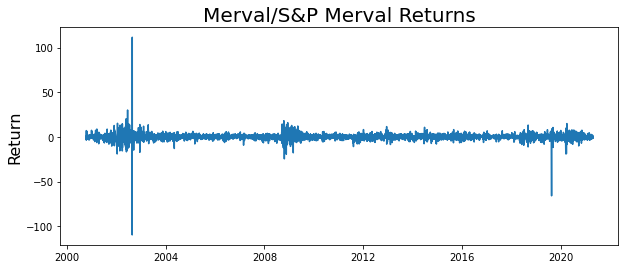

In [11]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Return', fontsize=16)
plt.title('Merval/S&P Merval Returns', fontsize=20)

In [12]:
returns.head()

,MERVAL
Date,
2000-10-11,-1.121676
2000-10-12,-2.798773
2000-10-13,0.646357
2000-10-17,-3.423678
2000-10-18,-2.780468


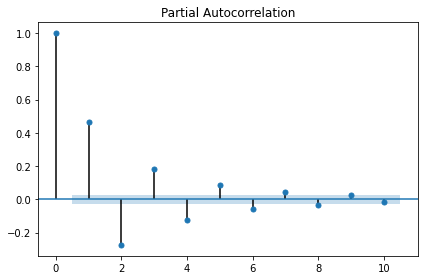

In [13]:
plot_pacf(returns**2, lags = 10)
plt.tight_layout()
fig_path_pacf = '/content/drive/My Drive/Arch_vs_Garch/viz/pacf.png' 
plt.savefig(fig_path_pacf)

In [14]:
model = arch_model(returns, p=3, q=3)

In [15]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 12437.534769439906
Iteration:      2,   Func. Count:     24,   Neg. LLF: 12434.29317862178
Iteration:      3,   Func. Count:     36,   Neg. LLF: 12412.632128741636
Iteration:      4,   Func. Count:     47,   Neg. LLF: 12386.645726607643
Iteration:      5,   Func. Count:     58,   Neg. LLF: 12337.105528277247
Iteration:      6,   Func. Count:     69,   Neg. LLF: 12323.133183404574
Iteration:      7,   Func. Count:     80,   Neg. LLF: 12307.836181495906
Iteration:      8,   Func. Count:     91,   Neg. LLF: 12291.108966150816
Iteration:      9,   Func. Count:    102,   Neg. LLF: 12285.84073852492
Iteration:     10,   Func. Count:    113,   Neg. LLF: 12282.693825734019
Iteration:     11,   Func. Count:    123,   Neg. LLF: 12277.90217847579
Iteration:     12,   Func. Count:    134,   Neg. LLF: 12277.122936541331
Iteration:     13,   Func. Count:    145,   Neg. LLF: 12276.656512470223
Iteration:     14,   Func. Count:    155,   Neg. LLF: 

In [16]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 MERVAL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -12275.7
Distribution:                  Normal   AIC:                           24567.5
Method:            Maximum Likelihood   BIC:                           24619.7
                                        No. Observations:                 5017
Date:                Thu, Aug 19 2021   Df Residuals:                     5016
Time:                        18:43:13   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0195  4.562e-02      0.427      0.669 [-6.994e-02,  0.109]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.9460      0.890      1.063      0.288    [ -0.799,  2.691]
alpha[1]       0.2418      0.106      2.286  2.223e-02  [3.452e-02,  0.449]
alpha[2]       0.2807      0.264      1.065      0.287    [ -0.236,  0.797]
alpha[3]       0.0000      0.153      0.000      1.000    [ -0.300,  0.300]
beta[1]        0.1392      0.514      0.271      0.786    [ -0.868,  1.146]
beta[2]        0.0338      0.108      0.314      0.754    [ -0.178,  0.245]
beta[3]        0.3045      0.200      1.524      0.128 [-8.709e-02,  0.696]
===========================================================================

Covariance estimator: robust
"""

In [17]:
model = arch_model(returns, p=3, q=0)

In [18]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 12923.797219301016
Iteration:      2,   Func. Count:     16,   Neg. LLF: 12883.584817409472
Iteration:      3,   Func. Count:     24,   Neg. LLF: 12719.892905152967
Iteration:      4,   Func. Count:     32,   Neg. LLF: 12614.388492433369
Iteration:      5,   Func. Count:     40,   Neg. LLF: 12564.422082609599
Iteration:      6,   Func. Count:     48,   Neg. LLF: 12531.396254166279
Iteration:      7,   Func. Count:     57,   Neg. LLF: 12522.047939296994
Iteration:      8,   Func. Count:     65,   Neg. LLF: 12514.851372523575
Iteration:      9,   Func. Count:     73,   Neg. LLF: 12460.58698758994
Iteration:     10,   Func. Count:     81,   Neg. LLF: 12434.322367198874
Iteration:     11,   Func. Count:     89,   Neg. LLF: 12426.747848215426
Iteration:     12,   Func. Count:     97,   Neg. LLF: 12421.502244461764
Iteration:     13,   Func. Count:    104,   Neg. LLF: 12414.350194338847
Iteration:     14,   Func. Count:    111,   Neg. LLF

In [19]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                 MERVAL   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -12411.8
Distribution:                  Normal   AIC:                           24833.5
Method:            Maximum Likelihood   BIC:                           24866.1
                                        No. Observations:                 5017
Date:                Thu, Aug 19 2021   Df Residuals:                     5016
Time:                        18:43:19   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu         3.7474e-03  5.230e-02  7.166e-02      0.943 [-9.875e-02,  0.106]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          3.5342      0.381      9.265  1.955e-20   [  2.787,  4.282]
alpha[1]       0.3923      0.142      2.764  5.701e-03   [  0.114,  0.670]
alpha[2]       0.4519      0.212      2.129  3.328e-02 [3.583e-02,  0.868]
alpha[3]       0.0849  2.620e-02      3.239  1.198e-03 [3.351e-02,  0.136]
==========================================================================

Covariance estimator: robust
"""

In [20]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,
/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternat

In [21]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

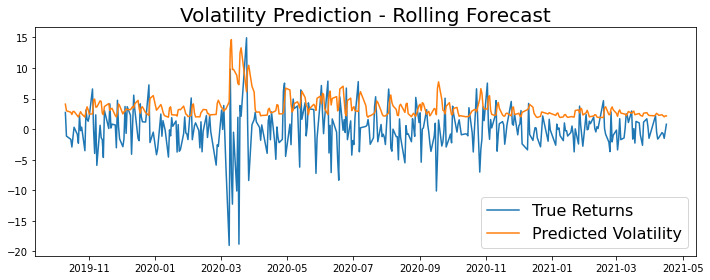

In [26]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)
plt.tight_layout()
fig_path_pred = '/content/drive/My Drive/Arch_vs_Garch/viz/pred.png' 
plt.savefig(fig_path_pred)

In [23]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [24]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


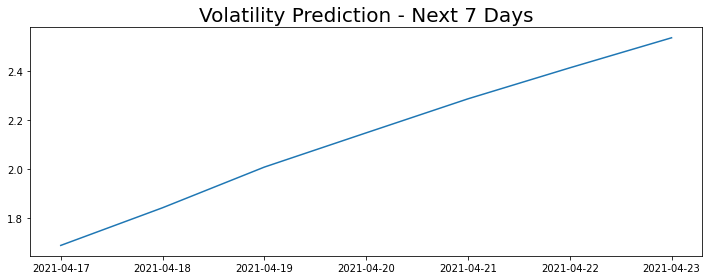

In [27]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)
plt.tight_layout()
fig_path_pred7d = '/content/drive/My Drive/Arch_vs_Garch/viz/pred7d.png' 
plt.savefig(fig_path_pred7d)